In [96]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [97]:
# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')

In [98]:
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [99]:
dataset.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [100]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [102]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [103]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3)

In [105]:
len(X_test)

10

In [106]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [107]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [108]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [109]:
df = pd.DataFrame(X_test, columns=['Experience'])

In [110]:
df['Pred_Salary'] = y_pred

In [111]:
df.head()

,Experience,Pred_Salary
0,8.2,101634.593134
1,9.5,113744.764855
2,6.8,88592.869741
3,3.2,55057.009590
4,1.3,37357.527844


In [112]:
regressor.coef_

array([9315.51670869])

In [113]:
regressor.intercept_

25247.356122398538

In [114]:
regressor.score(X_test, y_test)

0.9195129221897349

## Simple Linear Regression - Example 2

In [115]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [116]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [117]:
# shape of the DataFrame
data.shape

(200, 4)

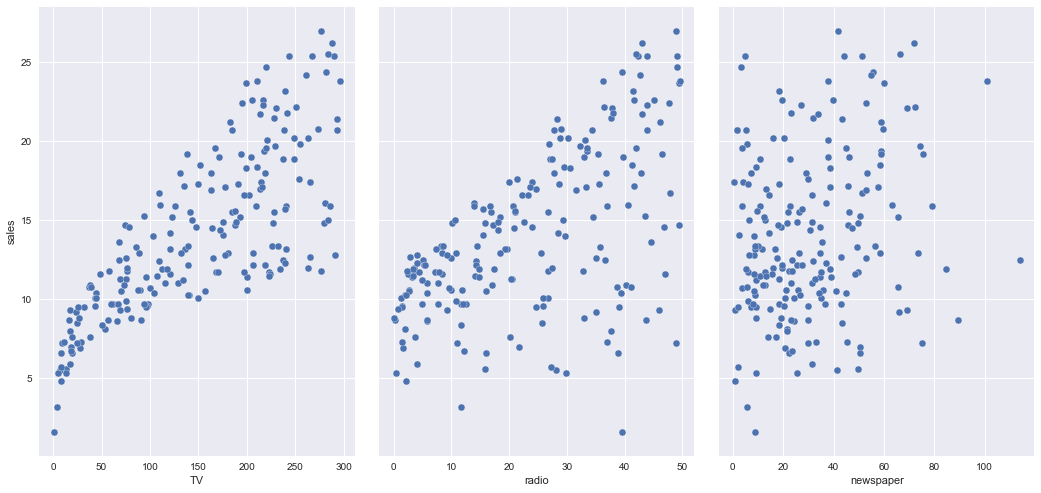

In [118]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7)

In [ ]:
Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget

The company might ask you the following: On the basis of this data, 
how should we spend our advertising money in the future?

This general question might lead you to more specific questions:

Is there a relationship between ads and sales?

How strong is that relationship?

Which ad types contribute to sales?

What is the effect of each ad type of sales?

Given ad spending in a particular market, can sales be predicted?

In [122]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='sales ~ TV', data=data).fit()

# print the coefficients
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [123]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

7.032593549127693
[0.04753664]


In [ ]:
Interpreting the TV coefficient ( β1 )

A "unit" increase in TV ad spending is associated with 
a 0.047537 "unit" increase in Sales

Or 
more clearly: An additional $1,000 spent on TV ads is associated with 
an increase in sales of 47.537 widgets

Note here that the coefficients represent associations, not causations

## Using the Model for Prediction

In [ ]:
Let's say that there was a new market where the TV advertising spend was $50,000. 
What would we predict for the Sales in that market?

In [ ]:
y = 7.032594 + 0.047537 * 50

In [124]:
### STATSMODELS ###

# you have to create a DataFrame 
#since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
lm1.predict(X_new)

0    9.409426
dtype: float64

In [125]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [126]:
### SCIKIT-LEARN ###

# predict for a new observation
lm2.predict(50)

array([9.40942557])

## Plotting the Least Squares Line

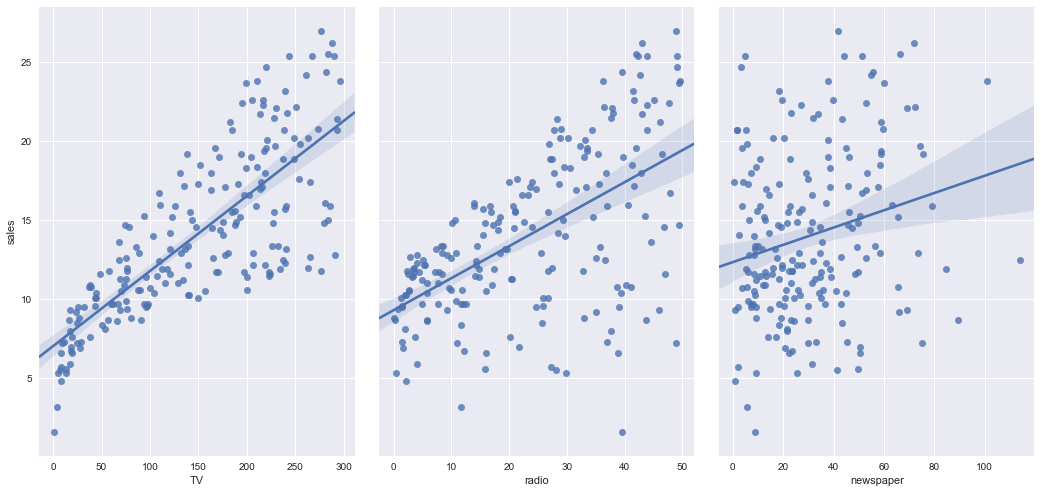

In [127]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

## Hypothesis testing

In [ ]:
null hypothesis:
There is no relationship between TV ads and Sales
β1  equals zero

alternative hypothesis:
There is a relationship between TV ads and Sales
β1  is not equal to zero

In [128]:
### STATSMODELS ###

# print the p-values for the model coefficients
lm1.pvalues        #less than 0.05 p value means accept alternative hypothesis

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [129]:
### STATSMODELS ###

# print the R-squared value for the model
lm1.rsquared

0.611875050850071

In [130]:
### SCIKIT-LEARN ###

# print the R-squared value for the model
lm2.score(X, y)

0.611875050850071

## Multiple Linear Regression

## y = β0 + β1×TV + β2×Radio + β3×Newspaper

In [131]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

# print the coefficients
lm1.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [132]:
lm1.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64

In [137]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV', 'radio']
X = data[feature_cols]
y = data.sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

2.9210999124051362
[0.04575482 0.18799423]


In [138]:
lm2.score(X,y)

0.8971942610828956

In [139]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.04575481510107616), ('radio', 0.18799422662030923)]

In [140]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 23 Oct 2018   Prob (F-statistic):           1.58e-96
Time:                        16:32:23   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/